In [ ]:
Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('C:/Users/jyoti/Documents/Engineering Third Year/DSBDAL/datasets/Social_Network_Ads.csv')

In [5]:
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

x= df[['Gender', 'Age', 'EstimatedSalary']]
y= df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f"Preprocessed features (x):\n{x_train[:5]}")

Preprocessed features (x):
[[-1.         -1.06675246 -0.38634438]
 [ 1.          0.79753468 -1.22993871]
 [-1.          0.11069205  1.853544  ]
 [-1.          0.60129393 -0.90995465]
 [-1.          1.87685881 -1.28811763]]


In [7]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print(f"Predicted values:\n{y_pred}")

Predicted values:
[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]



Confusion Matrix{cm}


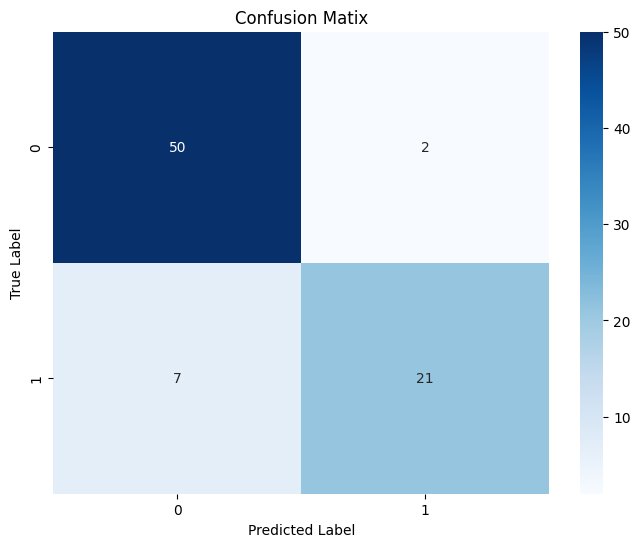

Confusion Matrix:
[[50  2]
 [ 7 21]]
True Positive (TP): 21
False Positive (FP): 2
True Negative (TN): 50
False Negative (FN): 7
Accuracy: 0.8875
Error Rate: 0.11250000000000004
Precision: 0.9130434782608695
Recall: 0.75
F1 Score: 0.8235294117647058


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix{cm}")

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap = "Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

TN, FP, FN, TP = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
error_rate= 1- accuracy
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")